# IS4487 Week 5 - Practice Code

This notebook is designed to help you follow along with the **Week 5 Lecture and Reading**

The practice code demos are intended to give you a chance to see working code and can be a source for your lap and assignment work.  Each section contains short explanations and annotated code that reflect the steps in the reading.

### Topics for this demo:
- Univariate analysis
- Multi-variate analysis

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Demos/demo_05_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Context: Financial Risk Assesement Analytics
FinTrust Bank is a mid-sized financial institution that provides consumer loans, credit cards, and mortgages. The risk analytics team is investigating patterns in customer borrowing behavior to better understand which customers are most likely to default on their loans.

Your task is to explore the data to understand how each variable behaves in the financial risk assesment.

# Step 1: Install and Import all Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset (replace with your own file if needed)

In [ ]:
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/fintrust_loans.csv'  # Replace with uploaded URL or path
df = pd.read_csv(url)

# Step 3: Preview and Basic Info

In [ ]:
print(df.head())

  Loan_ID  Gender  Age Married     Education EmploymentStatus  \
0  LN1000    Male   52     Yes      Graduate         Employed   
1  LN1001  Female   59      No  Not Graduate         Employed   
2  LN1002    Male   52     Yes      Graduate         Employed   
3  LN1003    Male   24      No  Not Graduate         Employed   
4  LN1004    Male   50      No  Not Graduate         Employed   

   ApplicantIncome  LoanAmount  LoanTerm  CreditScore  HasPreviousDefaults  \
0             4417     66511.0     360.0        723.0                    0   
1             3997    238234.0     120.0        612.0                    0   
2             7093     87924.0     360.0        742.0                    0   
3             3035    109184.0      60.0        663.0                    1   
4             2129    215788.0       NaN        795.0                    0   

  LoanStatus  
0  Defaulted  
1       Paid  
2       Paid  
3       Paid  
4       Paid  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              200 non-null    object 
 1   Gender               200 non-null    object 
 2   Age                  200 non-null    int64  
 3   Married              200 non-null    object 
 4   Education            200 non-null    object 
 5   EmploymentStatus     200 non-null    object 
 6   ApplicantIncome      200 non-null    int64  
 7   LoanAmount           190 non-null    float64
 8   LoanTerm             190 non-null    float64
 9   CreditScore          190 non-null    float64
 10  HasPreviousDefaults  200 non-null    int64  
 11  LoanStatus           200 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,Age,ApplicantIncome,LoanAmount,LoanTerm,CreditScore,HasPreviousDefaults
count,200.000000,200.000000,190.000000,190.000000,190.000000,200.000000
mean,43.545000,4905.160000,146434.378947,170.463158,656.410526,0.140000
std,12.649825,1518.019844,52186.479879,114.499307,71.299427,0.347858
min,21.000000,888.000000,-24040.000000,36.000000,447.000000,0.000000
25%,32.750000,3973.000000,108421.500000,60.000000,611.250000,0.000000
50%,45.500000,4865.000000,151791.000000,180.000000,658.000000,0.000000
75%,53.000000,5797.750000,184586.250000,240.000000,702.500000,0.000000
max,64.000000,9175.000000,267868.000000,360.000000,820.000000,1.000000


# Step 4: Check for Missing Values

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Loan_ID                 0
Gender                  0
Age                     0
Married                 0
Education               0
EmploymentStatus        0
ApplicantIncome         0
LoanAmount             10
LoanTerm               10
CreditScore            10
HasPreviousDefaults     0
LoanStatus              0
dtype: int64


# Step 5: Univariate Visualization

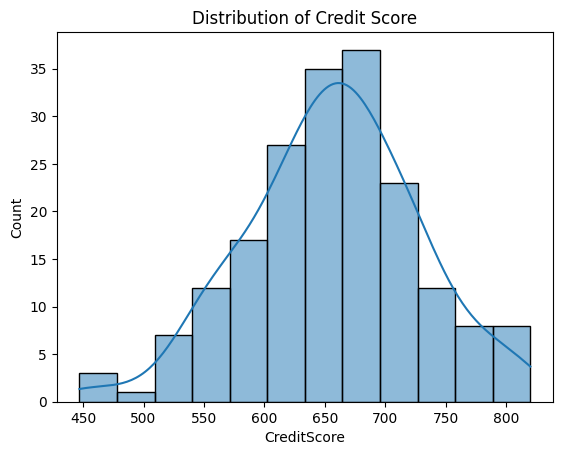

In [ ]:
sns.histplot(df['CreditScore'].dropna(), kde=True)
plt.title("Distribution of Credit Score")
plt.show()

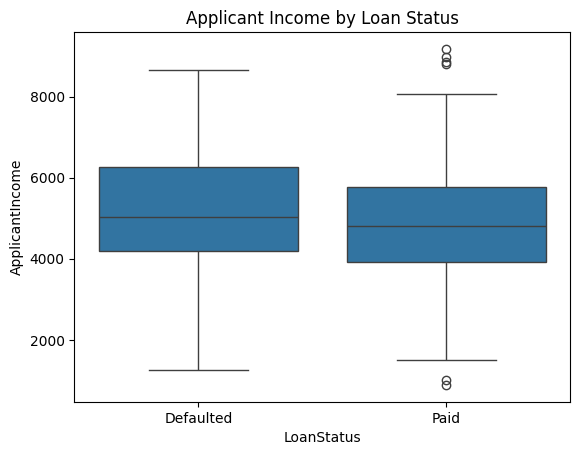

In [ ]:
sns.boxplot(x='LoanStatus', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Loan Status")
plt.show()

# Step 6: Bivariate Visualization

In [ ]:
correlation = df[['LoanAmount', 'CreditScore']].corr()
print(correlation)

             LoanAmount  CreditScore
LoanAmount     1.000000    -0.035202
CreditScore   -0.035202     1.000000


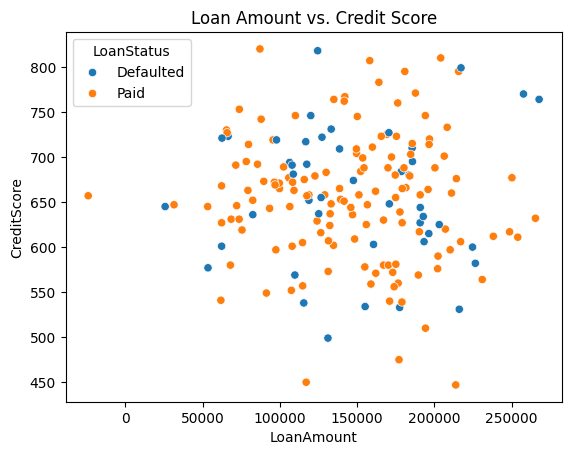

In [ ]:
sns.scatterplot(x='LoanAmount', y='CreditScore', hue='LoanStatus', data=df)
plt.title("Loan Amount vs. Credit Score")
plt.show()

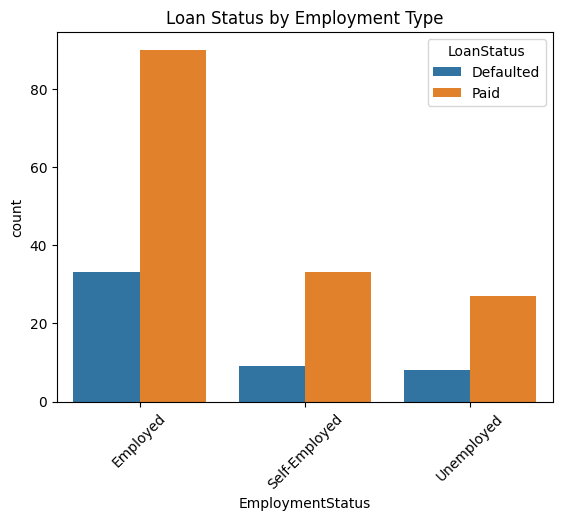

In [ ]:
sns.countplot(x='EmploymentStatus', hue='LoanStatus', data=df)
plt.title("Loan Status by Employment Type")
plt.xticks(rotation=45)
plt.show()

# Step 7: Outlier Detection using IQR

In [ ]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['LoanAmount'] < Q1 - 1.5 * IQR) | (df['LoanAmount'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of Loan Amount Outliers: {len(outliers)}")


Number of Loan Amount Outliers: 1


# Step 8: Ethical Reflection Prompt

In [ ]:
print("\nReflection: What are the risks of using demographic data like 'Gender' or 'Marital Status' to assess default risk? How can we mitigate bias in modeling?")


Reflection: What are the risks of using demographic data like 'Gender' or 'Marital Status' to assess default risk? How can we mitigate bias in modeling?
